# Experiment 8: Harris Corner Detection

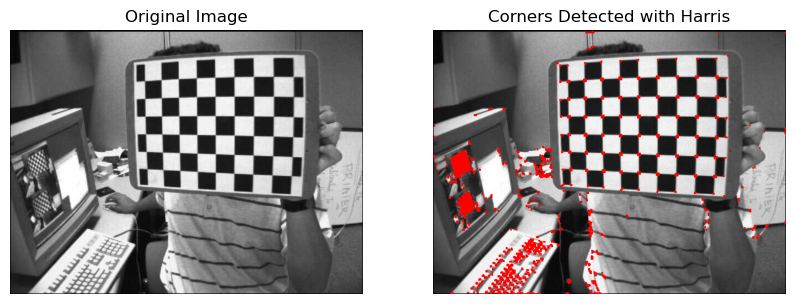

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Image Path
# Replace 'your_image.jpg' with the path to your image file.
# Make sure the image is in the same directory or provide the full path.
image_path = 'left01-Copy1.jpg'

# 2. Load the image
image = cv2.imread(image_path)
if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # 3. Create a copy of the image to mark corners on later
    output_image = image.copy()
    
    # 4. Convert to grayscale and float32
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    
    # 5. Apply the Harris Corner Detection algorithm
    # The cornerHarris function computes the Harris response measure R
    # Parameters:
    # gray: The input grayscale image, type float32.
    # blockSize: The size of the neighborhood considered for corner detection.
    # ksize: Aperture parameter for the Sobel operator.
    # k: Harris detector free parameter in the equation.
    dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    
    # 6. Dilate the corner response to make them more visible
    dst = cv2.dilate(dst, None)
    
    # 7. Threshold the Harris response to find corners
    # A common threshold is 0.01 * the maximum response value.
    # The pixels that exceed this threshold are the detected corners.
    output_image[dst > 0.01 * dst.max()] = [0, 0, 255]
    
    # 8. Display the results using Matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display the original image
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    # Display the image with detected corners
    axes[1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Corners Detected with Harris')
    axes[1].axis('off')
    
    plt.show()